In [217]:
#import necessary libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
#Use ordinal encoder to convert categorical data into numerical data.
from sklearn.preprocessing import OrdinalEncoder
#import regression algorithm.
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import ExtraTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

from imblearn.combine import SMOTETomek

#import classifier algorithms.
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix, classification_report



In [218]:
#Load the dataset
df = pd.read_csv(r'C:\Users\RUDRA\project\capstone5\Copper_Set.csv')
df.shape

(181673, 14)

In [123]:
df.columns

Index(['id', 'item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'material_ref',
       'product_ref', 'delivery date', 'selling_price'],
      dtype='object')

In [124]:
df.dtypes

id                object
item_date        float64
quantity tons     object
customer         float64
country          float64
status            object
item type         object
application      float64
thickness        float64
width            float64
material_ref      object
product_ref        int64
delivery date    float64
selling_price    float64
dtype: object

In [125]:
#checking the null values in this dataframe
df.isnull().sum()

id                   2
item_date            1
quantity tons        0
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        1
selling_price        1
dtype: int64

In [126]:
#checking the unique values of the all columns
for i in df.columns:
  print(i,":",df[i].nunique())

id : 181671
item_date : 252
quantity tons : 181673
customer : 1169
country : 17
status : 9
item type : 7
application : 30
thickness : 594
width : 1386
material_ref : 16563
product_ref : 33
delivery date : 28
selling_price : 9795


In [127]:
# dealing with data in wrong format,for categorical variables, this step is ignored
df['item_date'] = pd.to_datetime(df['item_date'], format='%Y%m%d', errors='coerce').dt.date
df['quantity tons'] = pd.to_numeric(df['quantity tons'], errors='coerce')
df['delivery date'] = pd.to_datetime(df['delivery date'], format='%Y%m%d', errors='coerce').dt.date


In [128]:
df.dtypes

id                object
item_date         object
quantity tons    float64
customer         float64
country          float64
status            object
item type         object
application      float64
thickness        float64
width            float64
material_ref      object
product_ref        int64
delivery date     object
selling_price    float64
dtype: object

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181670 non-null  object 
 2   quantity tons  181672 non-null  float64
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181670 non-null  object 
 13  selling_price  181672 non-null  float64
dtypes: float64(7), int64(1), object(6)
memory usage: 19.4+ MB


In [130]:
df.isnull().sum()

id                   2
item_date            3
quantity tons        1
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        3
selling_price        1
dtype: int64

In [131]:
#removing the "00000" datas in the "material_ref" column
df["material_ref"]=df["material_ref"].apply(lambda x: np.nan if str(x).startswith("00000") else x)

In [132]:
df.isnull().sum()

id                    2
item_date             3
quantity tons         1
customer              1
country              28
status                2
item type             0
application          24
thickness             1
width                 0
material_ref     100645
product_ref           0
delivery date         3
selling_price         1
dtype: int64

In [133]:
# "material_ref" have a maximum null values (55%) so, we want to drop the column
# And id is a unique values so we want to drop the column
df.drop(columns=["id","material_ref"],inplace=True)

In [134]:
df.isnull().sum()

item_date         3
quantity tons     1
customer          1
country          28
status            2
item type         0
application      24
thickness         1
width             0
product_ref       0
delivery date     3
selling_price     1
dtype: int64

In [135]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
quantity tons,181672.0,5.874926e+03,2.349081e+06,-2000.00,1.097030e+01,3.036464e+01,6.716061e+01,1.000000e+09
customer,181672.0,3.051221e+07,2.433382e+07,12458.00,3.019688e+07,3.020524e+07,3.028042e+07,2.147484e+09
country,181645.0,4.489302e+01,2.440421e+01,25.00,2.600000e+01,3.000000e+01,7.800000e+01,1.130000e+02
application,181649.0,2.561581e+01,1.775417e+01,2.00,1.000000e+01,1.500000e+01,4.100000e+01,9.900000e+01
thickness,181672.0,2.564827e+00,6.572321e+00,0.18,7.000000e-01,1.500000e+00,3.000000e+00,2.500000e+03
width,181673.0,1.295287e+03,2.616318e+02,1.00,1.180000e+03,1.250000e+03,1.500000e+03,2.990000e+03
product_ref,181673.0,4.739679e+08,7.175101e+08,611728.00,6.119930e+05,6.406650e+05,1.332077e+09,1.722208e+09
selling_price,181672.0,1.918036e+03,3.317956e+05,-1160.00,6.690000e+02,8.120000e+02,9.530000e+02,1.000010e+08


In [136]:
# quantity and selling price values are not below 0. so we convert to null for below 0 values.

df['quantity tons'] = df['quantity tons'].apply(lambda x: np.nan if x<=0 else x)
df['selling_price'] = df['selling_price'].apply(lambda x: np.nan if x<=0 else x)
df.isnull().sum()

item_date         3
quantity tons     5
customer          1
country          28
status            2
item type         0
application      24
thickness         1
width             0
product_ref       0
delivery date     3
selling_price     8
dtype: int64

#### Handling the null values using mean(),median() and mode()

In [137]:
# object columns and mode method
df["status"].fillna(df["status"].mode().iloc[0],inplace=True)
df["item_date"]. fillna(df["item_date"].mode().iloc[0],inplace=True)
df["delivery date"]. fillna(df["delivery date"].mode().iloc[0],inplace=True)
#numarical column and median()
df["quantity tons"].fillna(df["quantity tons"].median(),inplace=True)
df["customer"].fillna(df["customer"].median(),inplace=True)
df["country"].fillna(df["country"].median(),inplace=True)
df["application"].fillna(df["application"].median(),inplace=True)
df["thickness"].fillna(df["thickness"].median(),inplace=True)
df["selling_price"].fillna(df["selling_price"].median(),inplace=True)

In [138]:
df.isnull().sum()

item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

### Encoding the catagorical columns


In [139]:
df["status"].unique()

array(['Won', 'Draft', 'To be approved', 'Lost', 'Not lost for AM',
       'Wonderful', 'Revised', 'Offered', 'Offerable'], dtype=object)

In [140]:
df["status"]= df["status"].map({'Lost':0, 
                                'Won':1, 
                                'Draft':2, 
                                'To be approved':3, 
                                'Not lost for AM':4,
                                'Wonderful':5, 
                                'Revised':6, 
                                'Offered':7, 
                                'Offerable':8})

In [141]:
df["status"].unique()

array([1, 2, 3, 0, 4, 5, 6, 7, 8], dtype=int64)

In [142]:
df["item type"].unique()

array(['W', 'WI', 'S', 'Others', 'PL', 'IPL', 'SLAWR'], dtype=object)

In [143]:
df["item type"]= OrdinalEncoder().fit_transform(df[["item type"]])

In [144]:
df["item type"].unique()

array([5., 6., 3., 1., 2., 0., 4.])

In [145]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
quantity tons,181673.0,5.874905e+03,2.349075e+06,0.00001,1.097167e+01,3.036501e+01,6.716038e+01,1.000000e+09
customer,181673.0,3.051221e+07,2.433375e+07,12458.00000,3.019688e+07,3.020524e+07,3.028042e+07,2.147484e+09
country,181673.0,4.489073e+01,2.440303e+01,25.00000,2.600000e+01,3.000000e+01,7.800000e+01,1.130000e+02
status,181673.0,1.316684e+00,1.330310e+00,0.00000,1.000000e+00,1.000000e+00,1.000000e+00,8.000000e+00
item type,181673.0,4.133036e+00,1.055230e+00,0.00000,3.000000e+00,5.000000e+00,5.000000e+00,6.000000e+00
application,181673.0,2.561441e+01,1.775342e+01,2.00000,1.000000e+01,1.500000e+01,4.100000e+01,9.900000e+01
thickness,181673.0,2.564822e+00,6.572303e+00,0.18000,7.000000e-01,1.500000e+00,3.000000e+00,2.500000e+03
width,181673.0,1.295287e+03,2.616318e+02,1.00000,1.180000e+03,1.250000e+03,1.500000e+03,2.990000e+03
product_ref,181673.0,4.739679e+08,7.175101e+08,611728.00000,6.119930e+05,6.406650e+05,1.332077e+09,1.722208e+09
selling_price,181673.0,1.918076e+03,3.317947e+05,0.10000,6.690000e+02,8.120000e+02,9.530000e+02,1.000010e+08


In [146]:
# detecting the skewed columns using plot
def plot(df,column):
  #distplot
  plt.figure(figsize=(15,4))
  plt.subplot(1,3,1)
  sns.distplot(df[column])
  plt.title("distplot for"+" "+column)

  #histogram plot

  plt.subplot(1,3,2)
  sns.histplot(df, x= column, kde= True, bins=30,color="salmon")
  plt.title("histogram plot for"+" "+column)

  #boxplot

  plt.subplot(1,3,3)
  sns.boxplot(df, x=column)
  plt.title("Box plot for"+" "+column)

In [147]:
skewed_columns=['quantity tons', 'customer', 'country', 'status',
                'item type', 'application', 'thickness', 'width', 'product_ref',
                'selling_price']

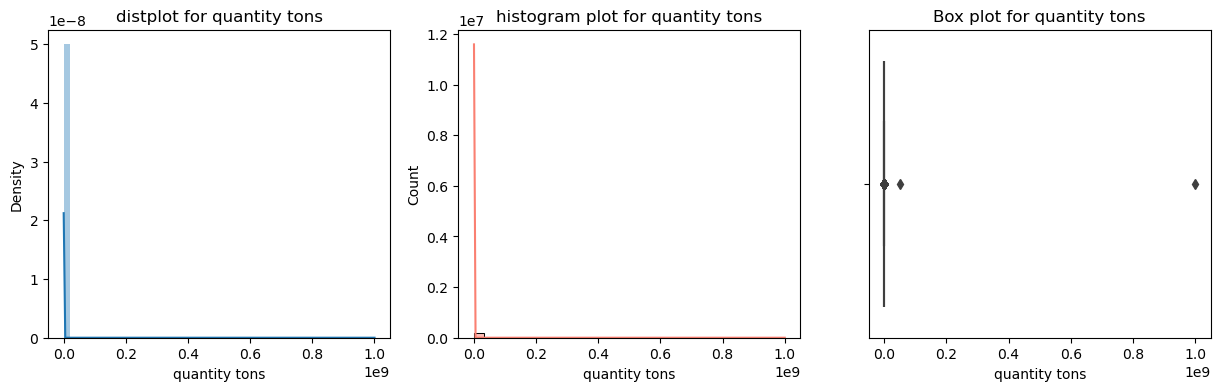

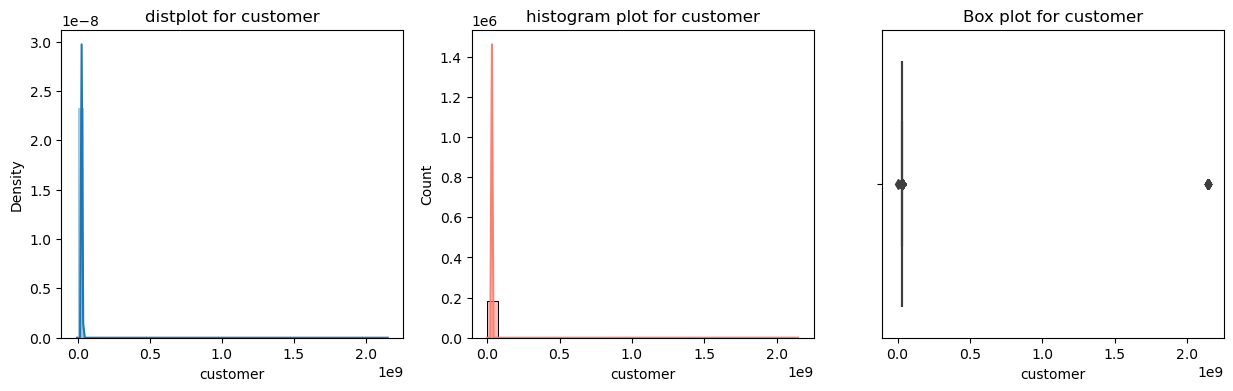

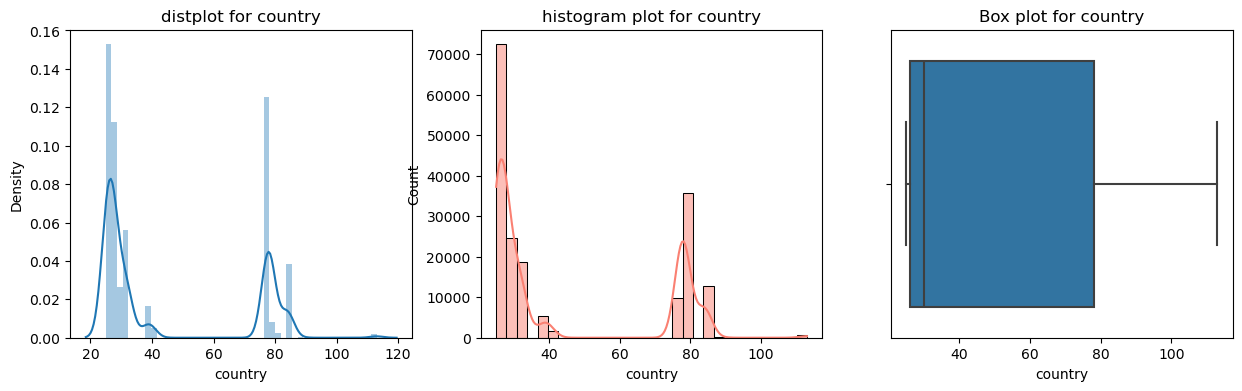

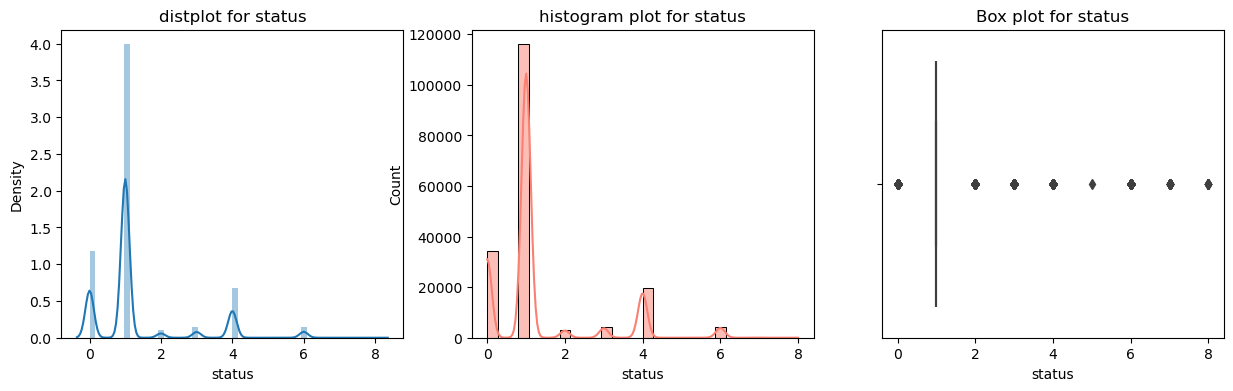

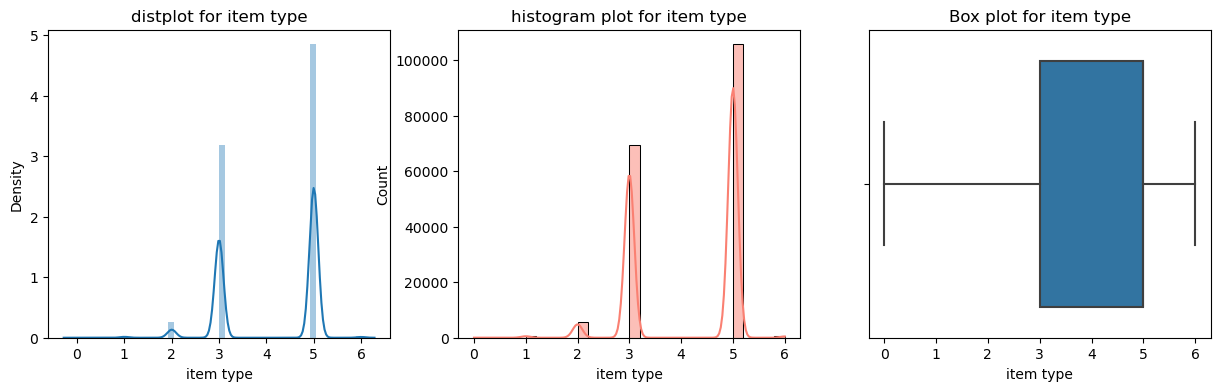

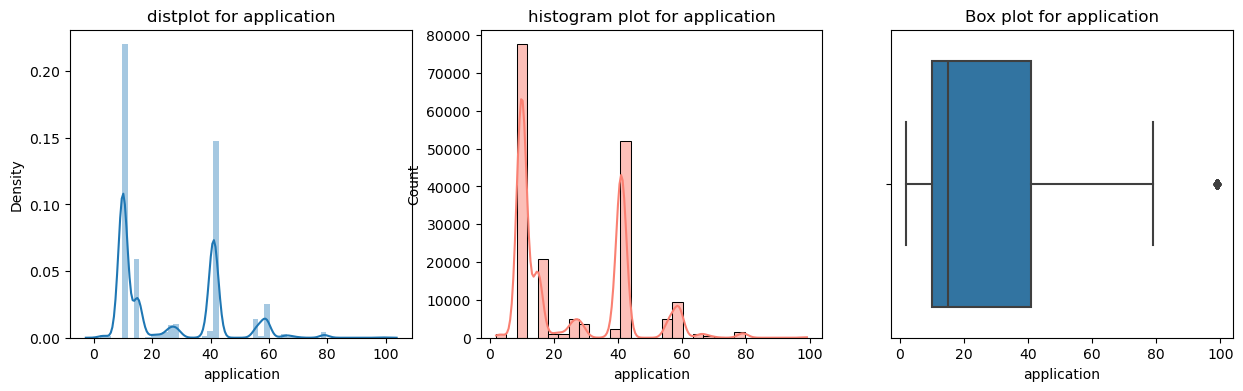

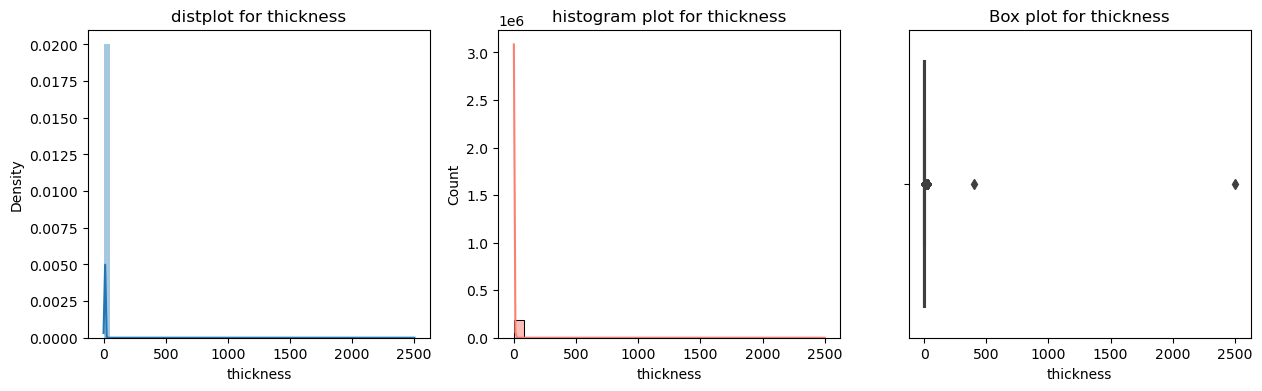

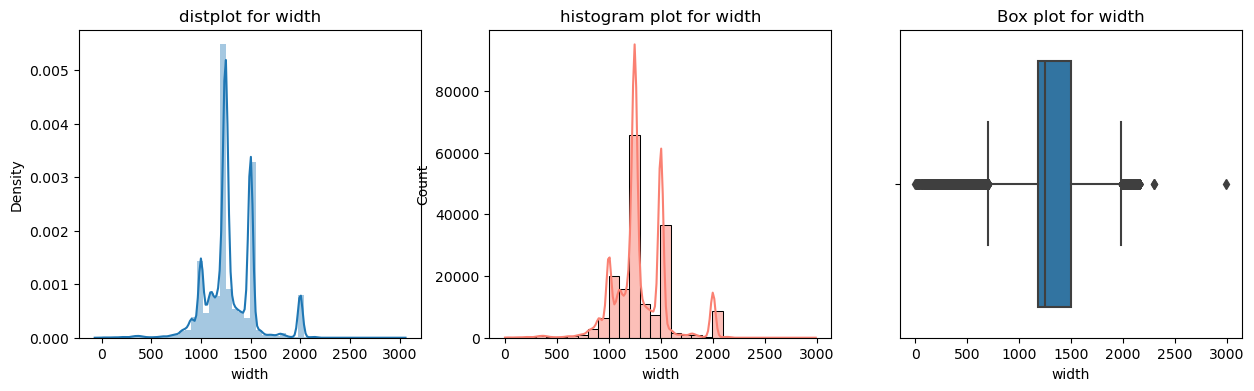

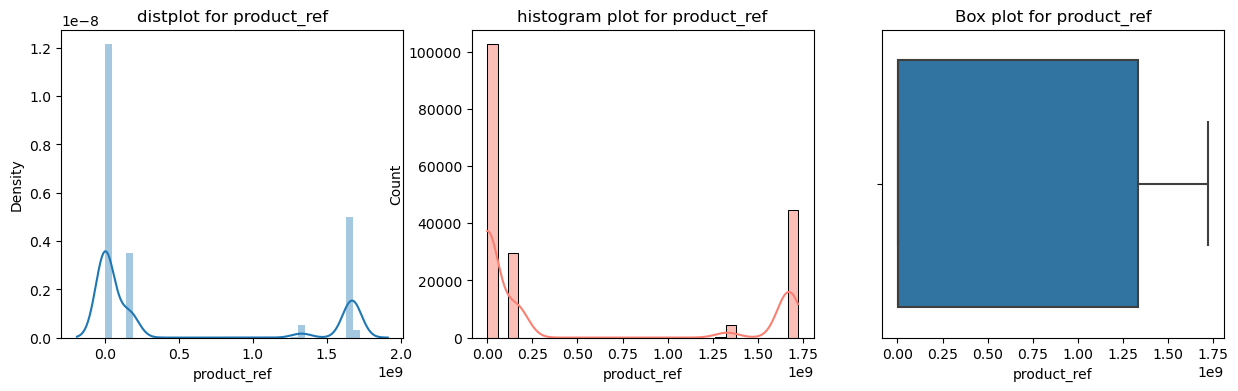

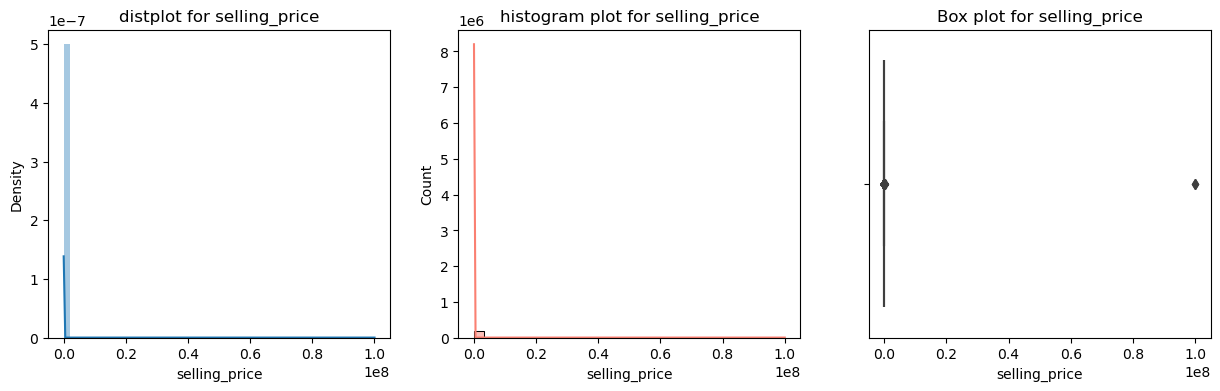

In [148]:
for i in skewed_columns:
  plot(df,i)

In [149]:
#Skewed columns:
# 1.quantity tons
# 2.customer
# 3.thickness
# 4.selling_price
     

In [150]:
df1= df.copy()

In [151]:
df1["quantity_tons_log"]= np.log(df1["quantity tons"])
df1["customer_log"]= np.log(df1["customer"])
df1["thickness_log"]= np.log(df1["thickness"])
df1["selling_price_log"]= np.log(df1["selling_price"])

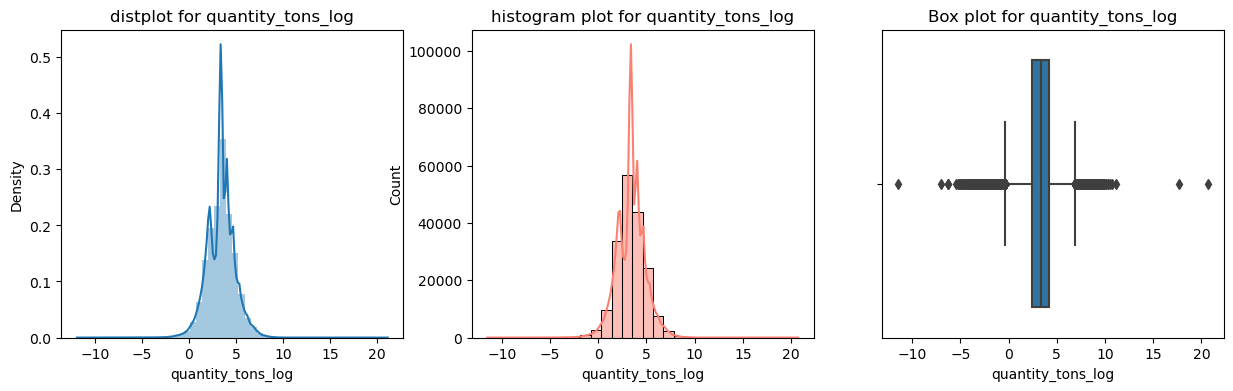

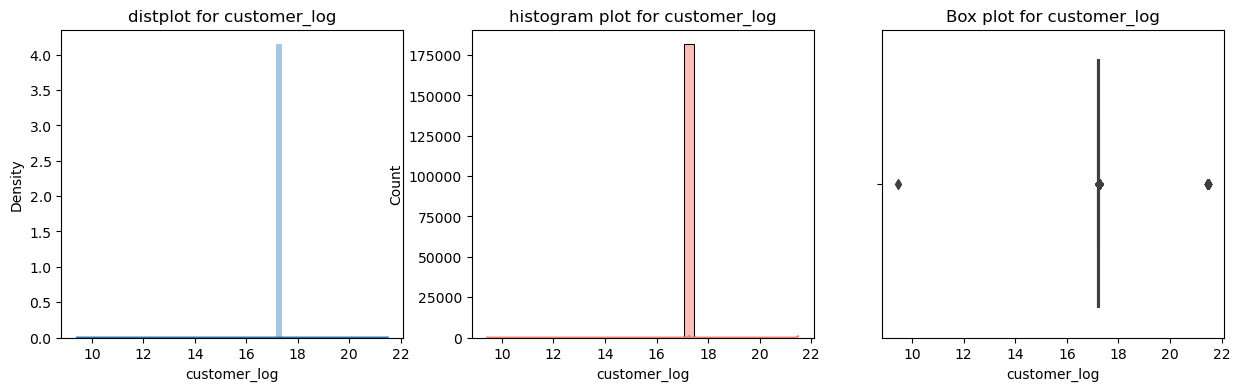

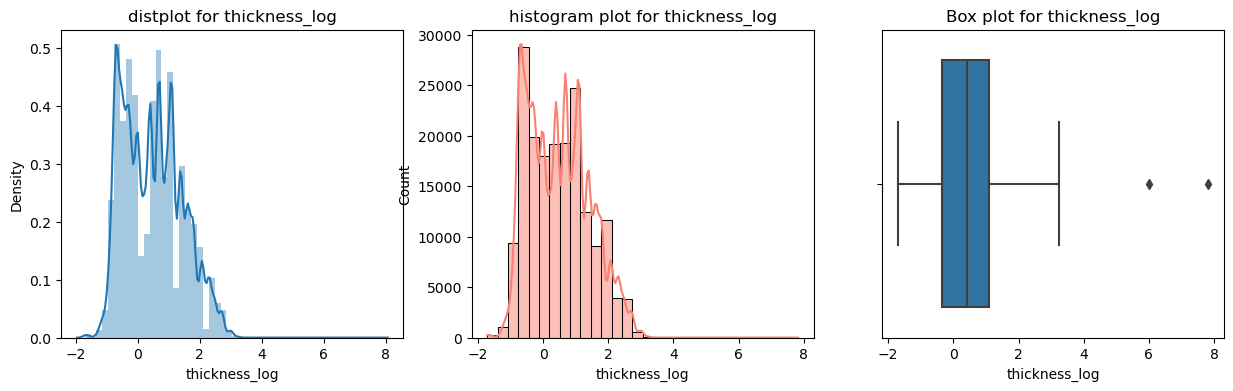

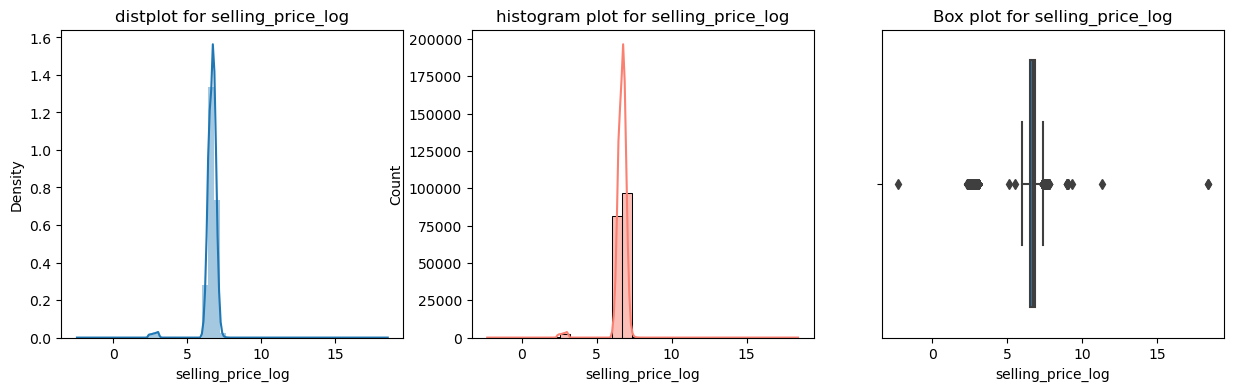

In [152]:
for i in ["quantity_tons_log","customer_log","thickness_log","selling_price_log"]:
  plot(df1,i)

In [153]:
def outlier(df,column):
  q1= df[column].quantile(0.1)
  q3= df[column].quantile(0.9)

  iqr= q3-q1

  upper_threshold= q3 
  lower_threshold= q1 

  df[column]= df[column].clip(lower_threshold, upper_threshold)


In [154]:
df2 = df1
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
quantity tons,181673.0,5.874905e+03,2.349075e+06,0.000010,1.097167e+01,3.036501e+01,6.716038e+01,1.000000e+09
customer,181673.0,3.051221e+07,2.433375e+07,12458.000000,3.019688e+07,3.020524e+07,3.028042e+07,2.147484e+09
country,181673.0,4.489073e+01,2.440303e+01,25.000000,2.600000e+01,3.000000e+01,7.800000e+01,1.130000e+02
status,181673.0,1.316684e+00,1.330310e+00,0.000000,1.000000e+00,1.000000e+00,1.000000e+00,8.000000e+00
item type,181673.0,4.133036e+00,1.055230e+00,0.000000,3.000000e+00,5.000000e+00,5.000000e+00,6.000000e+00
application,181673.0,2.561441e+01,1.775342e+01,2.000000,1.000000e+01,1.500000e+01,4.100000e+01,9.900000e+01
thickness,181673.0,2.564822e+00,6.572303e+00,0.180000,7.000000e-01,1.500000e+00,3.000000e+00,2.500000e+03
width,181673.0,1.295287e+03,2.616318e+02,1.000000,1.180000e+03,1.250000e+03,1.500000e+03,2.990000e+03
product_ref,181673.0,4.739679e+08,7.175101e+08,611728.000000,6.119930e+05,6.406650e+05,1.332077e+09,1.722208e+09
selling_price,181673.0,1.918076e+03,3.317947e+05,0.100000,6.690000e+02,8.120000e+02,9.530000e+02,1.000010e+08


In [155]:
X=df1[['quantity_tons_log','status','item type','application','thickness_log','width','country','customer','product_ref']]
y=df1['selling_price_log']

In [156]:
X

,quantity_tons_log,status,item type,application,thickness_log,width,country,customer,product_ref
0,3.991779,1,5.0,10.0,0.693147,1500.0,28.0,30156308.0,1670798778
1,6.643822,1,5.0,41.0,-0.223144,1210.0,25.0,30202938.0,1668701718
2,5.956169,1,6.0,28.0,-0.967584,952.0,30.0,30153963.0,628377
3,5.310301,1,3.0,59.0,0.832909,1317.0,32.0,30349574.0,1668701718
4,6.666354,1,5.0,10.0,1.386294,2000.0,28.0,30211560.0,640665
...,...,...,...,...,...,...,...,...,...
181668,4.629691,1,5.0,41.0,-0.040822,1220.0,25.0,30200854.0,164141591
181669,5.337954,1,5.0,41.0,-0.051293,1500.0,25.0,30200854.0,164141591
181670,1.443523,1,5.0,41.0,-0.342490,1250.0,25.0,30200854.0,164141591
181671,3.413291,1,5.0,41.0,-0.162519,1250.0,25.0,30200854.0,164141591


In [157]:
y

0         6.749931
1         6.953684
2         6.468211
3         6.643790
4         6.357842
            ...   
181668    6.381816
181669    6.378426
181670    6.428105
181671    6.398595
181672    6.408529
Name: selling_price_log, Length: 181673, dtype: float64

In [158]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(127171, 9)
(54502, 9)
(127171,)
(54502,)


In [ ]:
## LINEAR REGRESSION 

In [162]:
lr = LinearRegression()
lr.fit(X_train, y_train)
print("Score - train : ",lr.score(X_train, y_train))
print("Score - test : ",lr.score(X_test, y_test))

Score - train :  0.03702644771156638
Score - test :  0.03116372203141593


In [ ]:
## DecisionTreeRegressor

In [163]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
y_pred_train= dtr.predict(X_train)
y_pred_test = dtr.predict(X_test)
print('Mean squared error Train:', mean_squared_error(y_train, y_pred_train))
print('R-squared Train:', r2_score(y_train, y_pred_train))
print('Mean squared error Test:', mean_squared_error(y_test, y_pred_test))
print('R-squared Test:', r2_score(y_test, y_pred_test))

Mean squared error Train: 8.839490056223053e-35
R-squared Train: 1.0
Mean squared error Test: 0.03940387523874595
R-squared Test: 0.8800403445939994


In [164]:
## Random Forest Regressor

In [180]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred_train= rf.predict(X_train)
y_pred_test = rf.predict(X_test)
print('Mean squared error Train:', mean_squared_error(y_train, y_pred_train))
print('R-squared Train:', r2_score(y_train, y_pred_train))
print('Mean squared error Test:', mean_squared_error(y_test, y_pred_test))
print('R-squared Test:', r2_score(y_test, y_pred_test))

Mean squared error Train: 0.0033181160746098733
R-squared Train: 0.9894957776468599
Mean squared error Test: 0.021414068330728633
R-squared Test: 0.9348078268385942


In [ ]:
## GradientBoostingRegressor

In [167]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)
y_pred_train= gbr.predict(X_train)
y_pred_test = gbr.predict(X_test)
print('Mean squared error Train:', mean_squared_error(y_train, y_pred_train))
print('R-squared Train:', r2_score(y_train, y_pred_train))
print('Mean squared error Test:', mean_squared_error(y_test, y_pred_test))
print('R-squared Test:', r2_score(y_test, y_pred_test))

Mean squared error Train: 0.03479484293049585
R-squared Train: 0.8898493124814855
Mean squared error Test: 0.0350124154779984
R-squared Test: 0.8934095372542835


In [ ]:
## ExtraTreeRegressor

In [175]:
etrf = ExtraTreeRegressor()
etrf.fit(X_train, y_train)
y_pred_train= etrf.predict(X_train)
y_pred_test = etrf.predict(X_test)
print('Mean squared error Train:', mean_squared_error(y_train, y_pred_train))
print('R-squared Train:', r2_score(y_train, y_pred_train))
print('Mean squared error Test:', mean_squared_error(y_test, y_pred_test))
print('R-squared Test:', r2_score(y_test, y_pred_test))

Mean squared error Train: 1.8609452749943268e-35
R-squared Train: 1.0
Mean squared error Test: 0.041756610047101204
R-squared Test: 0.8728777684473142


In [ ]:
## XGBRegressor

In [176]:
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
y_pred_train= xgb.predict(X_train)
y_pred_test = xgb.predict(X_test)
print('Mean squared error Train:', mean_squared_error(y_train, y_pred_train))
print('R-squared Train:', r2_score(y_train, y_pred_train))
print('Mean squared error Test:', mean_squared_error(y_test, y_pred_test))
print('R-squared Test:', r2_score(y_test, y_pred_test))

Mean squared error Train: 0.023338420266468856
R-squared Train: 0.9261171247968343
Mean squared error Test: 0.024593988455364223
R-squared Test: 0.9251269992535246


In [ ]:
# ExtraTreesClassifier and DecisionTreeRegressor in training accuracy is overfitting.
# RandomForestClassifier is good interpretability, so we select the algorithm

In [184]:
#X=df1[['quantity_tons_log','status','item type','application','thickness_log','width','country','customer','product_ref']]
#y=df1['selling_price_log']
# Define the values for the new sample
new_quantity_tons_log = np.log(40)
status_en = 5.0
item_type_en = 4.0
application = 20.0
new_thickness_log = np.log(250)
new_width = 28
country = 25.0
new_customer = 30202938
new_product_ref = 1670798778

# Create the new sample as a numpy array
new_sample = np.array([[new_quantity_tons_log, status_en, item_type_en, application,
                         new_thickness_log, new_width, country, new_customer, new_product_ref]])

# Make predictions using the trained RandomForestRegressor model
new_pred = rf.predict(new_sample)[0]

# Display the predicted selling price
print("Selling Price:", np.exp(new_pred))

Selling Price: 709.9596170968238


In [181]:
#saving the model
import pickle

with open('Regression_Model.pkl', 'wb') as file:
    pickle.dump(rf, file)



In [182]:
with open("Regression_Model.pkl","rb") as r1:
  regg_model=pickle.load(r1)

In [185]:
# Make predictions using the trained RandomForestRegressor model
new_pred = regg_model.predict(new_sample)[0]

# Display the predicted selling price
print("Selling Price:", np.exp(new_pred))

Selling Price: 709.9596170968238


# classification

In [186]:
df1.head()

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,quantity_tons_log,customer_log,thickness_log,selling_price_log
0,2021-04-01,54.151139,30156308.0,28.0,1,5.0,10.0,2.00,1500.0,1670798778,2021-07-01,854.00,3.991779,17.221905,0.693147,6.749931
1,2021-04-01,768.024839,30202938.0,25.0,1,5.0,41.0,0.80,1210.0,1668701718,2021-04-01,1047.00,6.643822,17.223450,-0.223144,6.953684
2,2021-04-01,386.127949,30153963.0,30.0,1,6.0,28.0,0.38,952.0,628377,2021-01-01,644.33,5.956169,17.221827,-0.967584,6.468211
3,2021-04-01,202.411065,30349574.0,32.0,1,3.0,59.0,2.30,1317.0,1668701718,2021-01-01,768.00,5.310301,17.228293,0.832909,6.643790
4,2021-04-01,785.526262,30211560.0,28.0,1,5.0,10.0,4.00,2000.0,640665,2021-03-01,577.00,6.666354,17.223735,1.386294,6.357842


In [187]:
df_class = df1

In [188]:
# filter the status column only want to be a (won& loss)
df_c= df_class[(df_class["status"] == 1) | (df_class["status"] == 0)]

In [190]:
df_c["status"].value_counts()

status
1    116012
0     34438
Name: count, dtype: int64

In [191]:
df_c.columns

Index(['item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'product_ref',
       'delivery date', 'selling_price', 'quantity_tons_log', 'customer_log',
       'thickness_log', 'selling_price_log'],
      dtype='object')

In [198]:
# This is a imbalanced data
# so we want to resampling the data by usin the "SMOTETomek"
df_class = df_c[['quantity_tons_log','selling_price_log','item type', 'application','thickness_log',
           'width','country','customer','product_ref','status']]
x= df_class.drop(columns=["status"],axis=1)
y= df_class["status"]

In [199]:
x.shape,y.shape


((150450, 9), (150450,))

In [200]:
x_new,y_new= SMOTETomek().fit_resample(x,y)

In [202]:
x_new.shape,y_new.shape

((225758, 9), (225758,))

In [203]:
y_new.value_counts()

status
1    112879
0    112879
Name: count, dtype: int64

In [204]:
# now the data is balanced
# so, we continue the ML prediction

In [205]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_new, y_new, test_size = 0.3, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(158030, 9)
(67728, 9)
(158030,)
(67728,)


In [207]:
##KNeighborsClassifier

In [208]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:")
print(result1)

Confusion Matrix:
[[32013  1862]
 [ 3823 30030]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92     33875
           1       0.94      0.89      0.91     33853

    accuracy                           0.92     67728
   macro avg       0.92      0.92      0.92     67728
weighted avg       0.92      0.92      0.92     67728



In [209]:
##DecisionTreeClassifier

In [210]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)

result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:")
print(result1)

Confusion Matrix:
[[32102  1773]
 [ 2191 31662]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.94     33875
           1       0.95      0.94      0.94     33853

    accuracy                           0.94     67728
   macro avg       0.94      0.94      0.94     67728
weighted avg       0.94      0.94      0.94     67728



In [211]:
##RandomForestClassifier

In [223]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_train, rfc.predict(X_train))
print("Classification Report Train:")
print(result1)
result1 = classification_report(y_test, y_pred)
print("Classification Report Test:")
print(result1)

Confusion Matrix:
[[33196   679]
 [ 1739 32114]]
Classification Report Train:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     79004
           1       1.00      1.00      1.00     79026

    accuracy                           1.00    158030
   macro avg       1.00      1.00      1.00    158030
weighted avg       1.00      1.00      1.00    158030

Classification Report Test:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96     33875
           1       0.98      0.95      0.96     33853

    accuracy                           0.96     67728
   macro avg       0.96      0.96      0.96     67728
weighted avg       0.96      0.96      0.96     67728



In [213]:
##GradientBoostingClassifier

In [214]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)

y_pred = gbc.predict(X_test)

result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:")
print(result1)

Confusion Matrix:
[[27716  6159]
 [ 7794 26059]]
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.82      0.80     33875
           1       0.81      0.77      0.79     33853

    accuracy                           0.79     67728
   macro avg       0.79      0.79      0.79     67728
weighted avg       0.79      0.79      0.79     67728



In [215]:
##ExtraTreesClassifier

In [222]:
etc = ExtraTreesClassifier()
etc.fit(X_train, y_train)

y_pred = etc.predict(X_test)

result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_train, etc.predict(X_train))
print("Classification Report Train:")
print(result1)
result1 = classification_report(y_test, y_pred)
print("Classification Report Test:")
print(result1)

Confusion Matrix:
[[33320   555]
 [ 1593 32260]]
Classification Report Train:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     79004
           1       1.00      1.00      1.00     79026

    accuracy                           1.00    158030
   macro avg       1.00      1.00      1.00    158030
weighted avg       1.00      1.00      1.00    158030

Classification Report Test:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97     33875
           1       0.98      0.95      0.97     33853

    accuracy                           0.97     67728
   macro avg       0.97      0.97      0.97     67728
weighted avg       0.97      0.97      0.97     67728



In [220]:
##XGBClassifier

In [221]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:")
print(result1)

Confusion Matrix:
[[31761  2114]
 [ 3733 30120]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.94      0.92     33875
           1       0.93      0.89      0.91     33853

    accuracy                           0.91     67728
   macro avg       0.91      0.91      0.91     67728
weighted avg       0.91      0.91      0.91     67728



In [226]:
### As accuracy is more in ExtraTreesClassifier we take ExtraTreesClassifier model
from sklearn.metrics import accuracy_score, confusion_matrix


In [231]:

rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{cm}")

Accuracy: 0.964165485471297
Confusion Matrix:
[[33176   699]
 [ 1728 32125]]


Confusion Matrix:
[[33176   699]
 [ 1728 32125]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96     33875
           1       0.98      0.95      0.96     33853

    accuracy                           0.96     67728
   macro avg       0.96      0.96      0.96     67728
weighted avg       0.96      0.96      0.96     67728



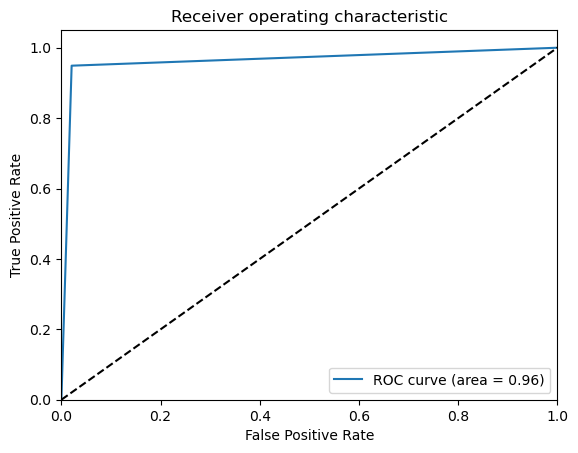

In [232]:
# Evalution Metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
# ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [233]:
# Define the values for the new sample
new_quantity_tons_log = np.log(40)
selling_price_log = np.log(50)
item_type_en = 4.0
application = 20.0
new_thickness_log = np.log(250)
new_width = 1500.0
country = 25.0
new_customer = 30202938
new_product_ref = 1670798778

# Create the new sample as a numpy array
new_sample = np.array([[new_quantity_tons_log, selling_price_log, item_type_en, application,
                         new_thickness_log, new_width, country, new_customer, new_product_ref]])

# Make predictions using the trained RandomForestRegressor model
new_pred = rfc.predict(new_sample)

if new_pred==1:
    print('The status is: Won')
else:
    print('The status is: Lost')

The status is: Won


In [234]:
# Saving the model
import pickle
with open('Classfier_Model.pkl', 'wb') as file:
    pickle.dump(rfc, file)